## Train a model with Diabetes data using XGBoost algorithm
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

done
done

# All requested packages already installed.



In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing

In [3]:
column_list_file = 'diabetes_train_column_list.txt'
train_file = 'diabetes_train.csv'
validation_file = 'diabetes_validation.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,6,92,62,32,126,32.0,0.085,46
1,0,5,132,80,0,0,26.8,0.186,69
2,0,3,106,72,0,0,25.8,0.207,27
3,0,4,99,68,38,0,32.8,0.145,33
4,0,4,96,56,17,49,20.8,0.340,26


In [8]:
df_validation.head()

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,1,130,70,13,105,25.9,0.472,22
1,1,8,133,72,0,0,32.9,0.270,39
2,0,0,137,68,14,148,24.8,0.143,21
3,0,2,88,74,19,53,29.0,0.229,22
4,1,9,130,70,0,0,34.2,0.652,45


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

classifier = xgb.XGBClassifier (objective="binary:logistic")

In [11]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
classifier.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)], eval_metric=['logloss'])

[0]	validation_0-logloss:0.656236	validation_1-logloss:0.65878
[1]	validation_0-logloss:0.62556	validation_1-logloss:0.633749
[2]	validation_0-logloss:0.599851	validation_1-logloss:0.615449
[3]	validation_0-logloss:0.576813	validation_1-logloss:0.597013
[4]	validation_0-logloss:0.557016	validation_1-logloss:0.583209
[5]	validation_0-logloss:0.539923	validation_1-logloss:0.572287
[6]	validation_0-logloss:0.524117	validation_1-logloss:0.560669
[7]	validation_0-logloss:0.510498	validation_1-logloss:0.550423
[8]	validation_0-logloss:0.498291	validation_1-logloss:0.54182
[9]	validation_0-logloss:0.486974	validation_1-logloss:0.532234
[10]	validation_0-logloss:0.4771	validation_1-logloss:0.524543
[11]	validation_0-logloss:0.468286	validation_1-logloss:0.518658
[12]	validation_0-logloss:0.460426	validation_1-logloss:0.513059
[13]	validation_0-logloss:0.453511	validation_1-logloss:0.510115
[14]	validation_0-logloss:0.446636	validation_1-logloss:0.507919
[15]	validation_0-logloss:0.439982	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
eval_result = classifier.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [15]:
print(training_rounds)

range(0, 100)


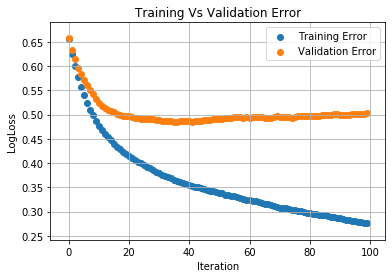

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()

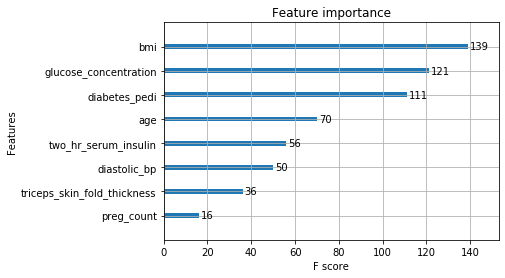

In [17]:
xgb.plot_importance(classifier)

In [18]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [19]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
X_test = df.iloc[:,:-1]
print(X_test[:5])

preg_count  glucose_concentration  diastolic_bp  \
0           6                    148            72   
1           1                     85            66   
2           8                    183            64   
3           1                     89            66   
4           0                    137            40   

   triceps_skin_fold_thickness  two_hr_serum_insulin   bmi  diabetes_pedi  age  
0                           35                     0  33.6          0.627   50  
1                           29                     0  26.6          0.351   31  
2                            0                     0  23.3          0.672   32  
3                           23                    94  28.1          0.167   21  
4                           35                   168  43.1          2.288   33  


In [21]:
result = classifier.predict(X_test)

In [22]:
result[:5]

array([1, 0, 1, 0, 1])

In [23]:
df['predicted_class'] = result

In [24]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class,predicted_class
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [25]:
print('Confusion matrix - Actual versus Predicted')
pd.crosstab(df['diabetes_class'], df['predicted_class'])

Confusion matrix - Actual versus Predicted


predicted_class,0,1
diabetes_class,,
0,453,47
1,65,203


In [26]:
import sklearn.metrics as metrics
print(metrics.classification_report(df['diabetes_class'], df['predicted_class']))

precision    recall  f1-score   support

           0       0.87      0.91      0.89       500
           1       0.81      0.76      0.78       268

    accuracy                           0.85       768
   macro avg       0.84      0.83      0.84       768
weighted avg       0.85      0.85      0.85       768

